In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.decomposition import PCA

import math

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred, descrip_of_run):
    plt.cla()
    # Check if the arrays have the same length
    if len(y_test) != len(y_pred):
        raise ValueError("The input arrays must have the same length.")

    # Create a scatter plot
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Line y_pred = y_test
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.title('Predicted vs Actual for ' + descrip_of_run)
    plt.grid(True)
    plt.show()

# Example usage
# y_test = np.array([1, 2, 3, 4, 5])
# y_pred = np.array([1.1, 1.9, 3.2, 3.8, 4.9])

# plot_predictions(y_testST, y_predST, 'Lasso with StandardScalar')

In [ ]:
df_ml = pd.read_csv(ml_tables_dir + ml_file)
df_ml_3week = pd.read_csv(ml_tables_dir + test_ml_file)
df_ml.append(df_ml_3week)
df_ml.append(df_ml_3week)
df_ml = df_ml.drop_duplicates(keep=False)

<ipython-input-22-868983262586>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ml.append(df_ml_3week)
<ipython-input-22-868983262586>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ml.append(df_ml_3week)


In [ ]:
X = df_ml.drop(columns=['yield'])
y = df_ml.loc[:,['yield']]
y_test_orig = y.copy()
X_train, y_train = X, y

In [ ]:
def read_whole_csv(ml_tables_dir, ml_file, drop_feature=False, shuffle=True):

  df_ml = pd.read_csv(ml_tables_dir + ml_file)
  X = df_ml.drop(columns=['yield'])
  y = df_ml.loc[:,['yield']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=shuffle)

  # keeping a copy of y_test, because it may get modified below

  if drop_feature:
    X_train = X_train.drop(columns=['ruling_party','gdp'])
    X_test = X_test.drop(columns=['ruling_party','gdp'])
  

  return X_train, X_test, y_train, y_test

In [ ]:
def read_test_csv(ml_tables_dir, ml_file):

  df_ml = pd.read_csv(ml_tables_dir + ml_file)
  X = df_ml.drop(columns=['yield'])
  y = df_ml.loc[:,['yield']]

  X_test = X
  y_test = y

  return X_test, y_test

In [ ]:
ml_tables_dir = './sample_data/'
ml_file = 'ML-TABLESML-table-weekly.csv'
X_train, _, y_train, _ = read_whole_csv(ml_tables_dir, ml_file)

In [ ]:
test_ml_file = '6w.csv'
X_train_3w, X_test_3w, y_train_3w, y_test_3w = read_whole_csv(ml_tables_dir, test_ml_file, shuffle=True)

In [ ]:
X_train_3w.shape

(4875, 83)

In [ ]:
def min_max_scaler(X_train, X_test, y_train, y_test):
  X_train = X_train.drop(columns=['year','state_name','county_name'])
  X_test = X_test.drop(columns=['year','state_name','county_name'])

  scalerXMM = MinMaxScaler().fit(X_train)
  scaleryMM = MinMaxScaler().fit(y_train)

  X_trainMM = scalerXMM.transform(X_train)
  y_trainMM = scaleryMM.transform(y_train)
  X_testMM = scalerXMM.transform(X_test)
  y_testMM = scaleryMM.transform(y_test)

  return X_trainMM, X_testMM, y_trainMM, y_testMM

In [ ]:
X_trainMM, X_testMM, y_trainMM, y_testMM = min_max_scaler(X_train, X_test_3w, y_train, y_test_3w)

In [ ]:
X_trainMM, X_testMM, y_trainMM, y_testMM = min_max_scaler(X_train_3w, X_test_3w, y_train_3w, y_test_3w)

In [ ]:
print(X_trainMM.shape)

(4875, 80)


In [ ]:
y_pred_gbm = lightGBM(X_trainMM, y_trainMM, X_testMM, y_testMM) #train: table-3w test:3w

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[189]	valid_0's rmse: 0.0642249	valid_0's l2: 0.00412484
0.06422490997225899
0.12844981994451798
0.6734412195923201


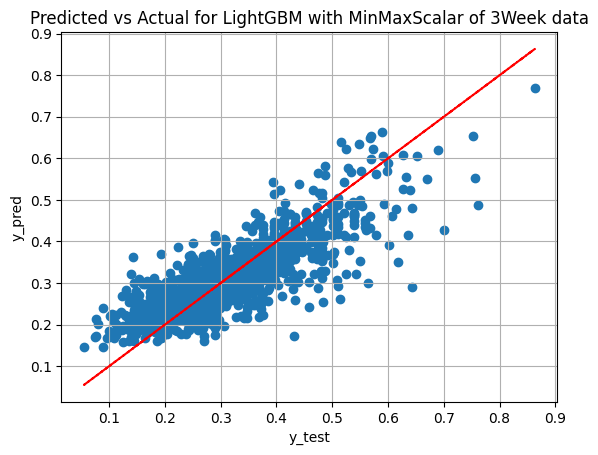

In [ ]:
plot_predictions(y_testMM, y_pred_gbm, 'LightGBM with MinMaxScalar of 6Week data') #train: table-3w test:3w

In [ ]:
X_trainMM_weekly, X_testMM_weekly, y_trainMM_weekly, y_testMM_weekly = min_max_scaler(X_train_weekly,
                                                                                      X_test_weekly, y_train_weekly, y_test_weekly)

In [ ]:
X_trainMM, X_testMM, y_trainMM, y_testMM = min_max_scaler(X_train, X_test, y_train, y_test)

In [ ]:
y_predMM = lasso_regression(X_trainMM, X_testMM, y_trainMM, y_testMM)

<ipython-input-8-4418a6484aff>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoMM.fit(X_trainMM, y_trainMM)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.08447352873653276
0.16894705747306552
0.4350687096802267


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+01, tolerance: 6.733e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
def lasso_regression(X_trainMM, X_testMM, y_trainMM, y_testMM):
  lassoMM = Lasso(alpha=0)
  lassoMM.fit(X_trainMM, y_trainMM)
  y_predMM = lassoMM.predict(X_testMM)
  rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
  rrmseMM = rmseMM / (0.5)
  r2MM = r2_score(y_testMM, y_predMM)
  print(rmseMM)
  print(rrmseMM)
  print(r2MM)
  return y_predMM

In [ ]:
def random_forest(X_trainMM, X_testMM, y_trainMM, y_testMM, max_depth=-30):
  # random forest regressor
  regrMM = RandomForestRegressor(max_depth=max_depth, random_state=0)
  #   with depth 2
  #      0.11349253447526553
  #      0.22698506895053105
  #      0.2773587277559947
  # regrMM = RandomForestRegressor(max_depth=10, random_state=0)
  #   with depth 10:
  #      0.06593145947060583
  #      0.13186291894121166
  #      0.7561214796081714
  # regrMM = RandomForestRegressor(max_depth=20, random_state=0)
  #   with depth 20:
  #      0.06060039414793919
  #      0.12120078829587838
  #      0.7939659164434344

  # for some reason, need to use y_trainMM.ravel() rather than simply y_trainMM
  regrMM.fit(X_trainMM, y_trainMM.ravel())

  regr_y_predMM = regrMM.predict(X_testMM)
  rmseMM = math.sqrt(mean_squared_error(y_testMM, regr_y_predMM))
  rrmseMM = rmseMM / (0.5)
  r2MM = r2_score(y_testMM, regr_y_predMM)
  print(rmseMM)
  print(rrmseMM)
  print(r2MM)

  return regr_y_predMM

In [ ]:
def lightGBM(X_trainMM, y_trainMM, X_testMM, y_testMM):
  gbm = lgb.LGBMRegressor(num_leaves=31,
                          learning_rate=0.05,
                          n_estimators=200)
  gbm.fit(X_trainMM, y_trainMM,
          eval_set=[(X_testMM, y_testMM)],
          eval_metric='rmse',
          callbacks=[lgb.early_stopping(5)])
  y_predMM = gbm.predict(X_testMM)
  rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
  rrmseMM = rmseMM / (0.5)
  r2MM = r2_score(y_testMM, y_predMM)
  print(rmseMM)
  print(rrmseMM)
  print(r2MM)
  return y_predMM

In [ ]:
def mlp_regression(X_trainMM, y_trainMM, X_testMM, y_testMM):
  regr = MLPRegressor(hidden_layer_sizes=(300, 100, 50), batch_size=500, random_state=0, max_iter=300,
                    learning_rate_init=0.001, early_stopping=True).fit(X_trainMM, y_trainMM)
  y_predMM = regr.predict(X_testMM)
  rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
  rrmseMM = rmseMM / (0.5)
  r2MM = r2_score(y_testMM, y_predMM)
  print(rmseMM)
  print(rrmseMM)
  print(r2MM)
  return y_predMM

In [ ]:
y_predMM_weekly = lasso_regression(X_trainMM_weekly, X_testMM_weekly, y_trainMM_weekly, y_testMM_weekly)

<ipython-input-22-4418a6484aff>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoMM.fit(X_trainMM, y_trainMM)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.07193227353128091
0.14386454706256183
0.5903604020335318


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+01, tolerance: 6.733e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X_trainMM)

PCA(n_components=2, svd_solver='full')